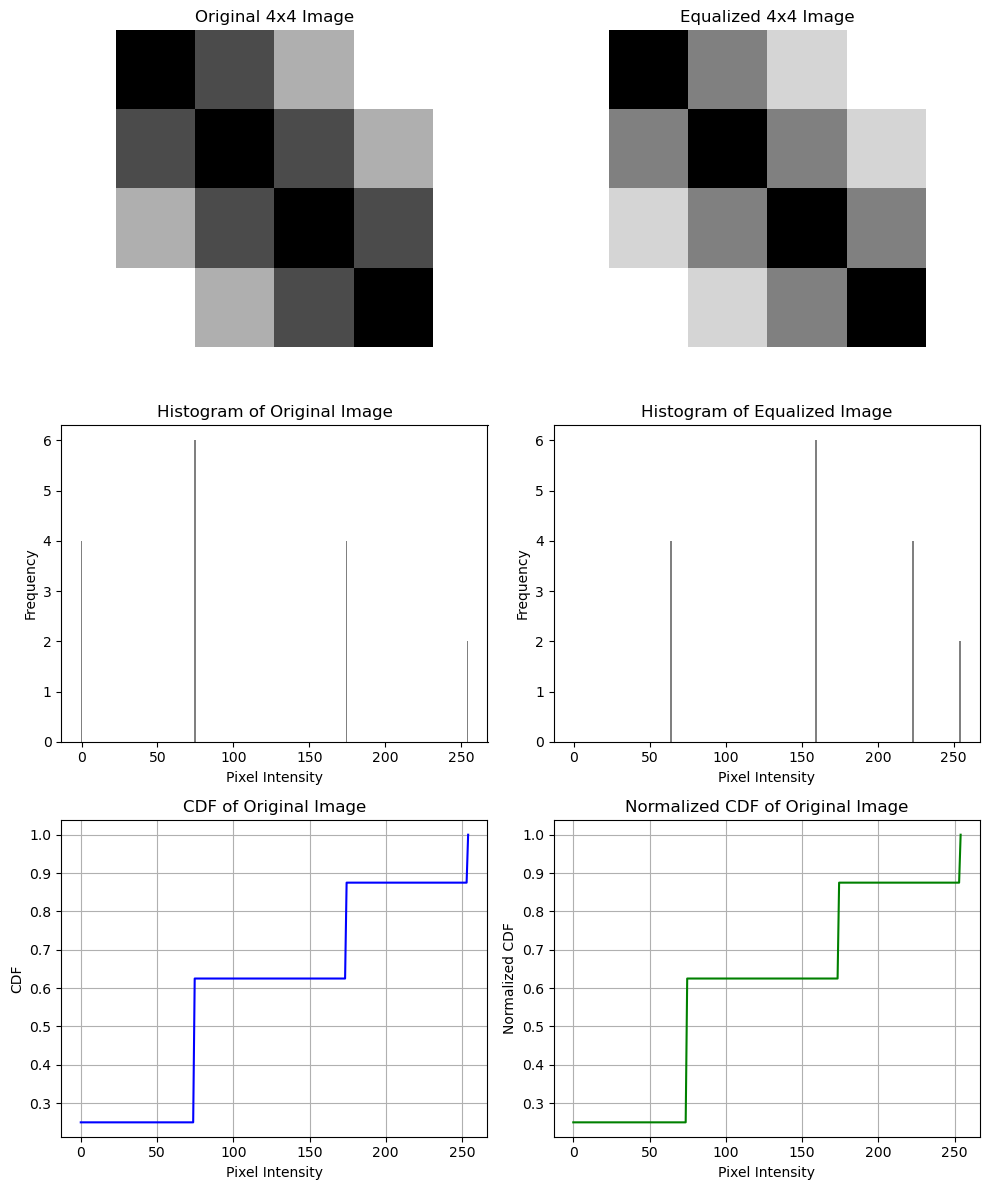

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def gradient_chessboard_4x4():
    # Size of the 4x4 grid
    rows, cols = 4, 4
    fig, ax = plt.subplots(figsize=(6, 6))

    # Loop through each square in the 4x4 grid
    intensities = []  # List to store the intensity values
    for i in range(rows):
        for j in range(cols):
            # Define intensity based on diagonal distance
            intensity = 255  # Default: white
            if i == j:
                intensity = 0  # Main diagonal: black
            elif abs(i - j) == 1:
                intensity = 75  # Next diagonal: lighter black
            elif abs(i - j) == 2:
                intensity = 175  # Further diagonal: even lighter

            intensities.append(intensity)

            # Convert intensity to RGB color
            color = (intensity / 255, intensity / 255, intensity / 255)

            # Plot each square
            ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor='black'))

    # Formatting the grid
    ax.set_xticks(np.arange(0, cols, 1))
    ax.set_yticks(np.arange(0, rows, 1))
    ax.set_xticklabels([])  # Remove x-axis ticks
    ax.set_yticklabels([])  # Remove y-axis ticks
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)

    plt.gca().set_aspect('equal', adjustable='box')  # Maintain aspect ratio
    plt.title("Original 4x4 Chessboard-like Grid")

    # Save the plot as a PNG file
    plt.savefig('gradient_chessboard_4x4_matplotlib.png', dpi=300)
    plt.close()  # Close the figure to free memory

    return intensities

# Generate the original image intensities
original_intensities = gradient_chessboard_4x4()

# Now, let's plot the original image
image = np.array(original_intensities).reshape(4, 4)

# Display the original image
plt.figure(figsize=(10, 12))
plt.subplot(3, 2, 1)  # First row, first column
plt.imshow(image, cmap='gray')
plt.title('Original 4x4 Image')
plt.axis('off')

# Perform histogram equalization on the original image's intensities
# Calculate the histogram
histogram, bins = np.histogram(image.flatten(), bins=256, range=(0, 255))

# Compute the cumulative distribution function (CDF)
cdf = histogram.cumsum()
cdf_normalized = cdf / cdf.max()  # Normalize CDF to range [0, 1]

# Map the CDF values to the intensity range [0, 255]
equalized_intensities = np.interp(image.flatten(), bins[:-1], cdf_normalized * 255).reshape(4, 4)

# Display the equalized image
plt.subplot(3, 2, 2)  # First row, second column
plt.imshow(equalized_intensities, cmap='gray')
plt.title('Equalized 4x4 Image')
plt.axis('off')

# Plot the original image histogram
plt.subplot(3, 2, 3)  # Second row, first column
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.bar(bins[:-1], histogram, width=1, color='gray')

# Plot the equalized image histogram
equalized_histogram, equalized_bins = np.histogram(equalized_intensities.flatten(), bins=256, range=(0, 255))
plt.subplot(3, 2, 4)  # Second row, second column
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.bar(equalized_bins[:-1], equalized_histogram, width=1, color='gray')

# Plot the CDF of the original image
plt.subplot(3, 2, 5)  # Third row, first column
plt.title('CDF of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('CDF')
plt.plot(bins[:-1], cdf / cdf.max(), color='blue')  # Normalize CDF
plt.grid(True)

# Plot the normalized CDF of the original image
plt.subplot(3, 2, 6)  # Third row, second column
plt.title('Normalized CDF of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized CDF')
plt.plot(bins[:-1], cdf_normalized, color='green')  # Normalized CDF
plt.grid(True)

# Adjust layout and show all plots
plt.tight_layout()
plt.show()

# Save the images as separate files
plt.imsave('original_4x4_image.png', image, cmap='gray')
plt.imsave('equalized_4x4_image.png', equalized_intensities, cmap='gray')



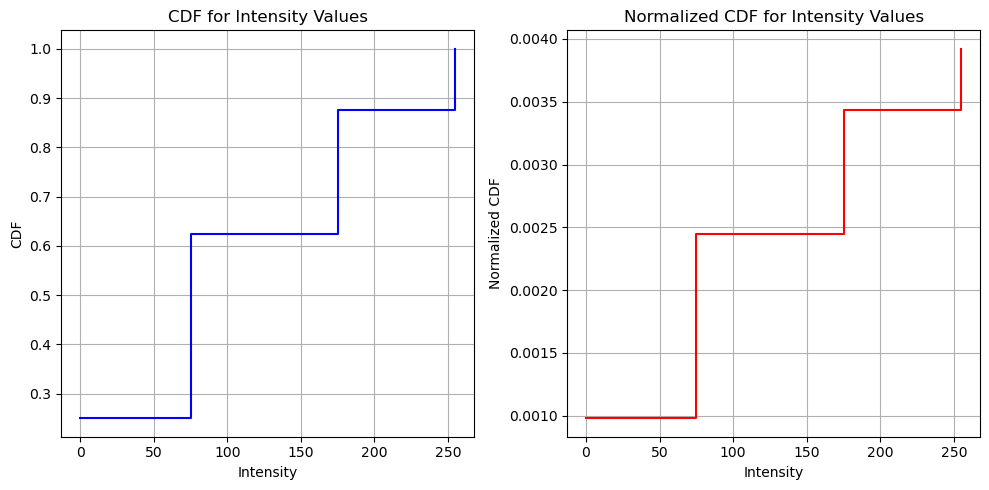

In [24]:
import matplotlib.pyplot as plt

# Intensities and their corresponding CDF values
intensities = [0, 75, 175, 255]
cdf_values = [0.25, 0.625, 0.875, 1.0]
normalized_cdf_values = [x / 255 for x in cdf_values]

# Plot CDF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.step(intensities, cdf_values, where='post', color='blue', label='CDF')
plt.xlabel('Intensity')
plt.ylabel('CDF')
plt.title('CDF for Intensity Values')
plt.grid(True)

# Plot Normalized CDF
plt.subplot(1, 2, 2)
plt.step(intensities, normalized_cdf_values, where='post', color='red', label='Normalized CDF')
plt.xlabel('Intensity')
plt.ylabel('Normalized CDF')
plt.title('Normalized CDF for Intensity Values')
plt.grid(True)

plt.tight_layout()
plt.show()
